In [10]:
import pandas as pd

import json
import re
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import matplotlib.pyplot as plt

import tqdm

In [8]:
paris_data = pd.read_csv('full_paris_emolex_modified.csv')

In [3]:
paris_data.head()

,Unnamed: 0,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location
0,0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland"
1,1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States
2,2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN
3,3,1028964314298896386,Mon Aug 13 11:19:44 +0000 2018,there is no planet “b”! there is no where to h...,1,0,86438480,CharlesBullar,Charles Bullard,"Wilmington, Delaware"
4,4,1028966105841315842,Mon Aug 13 11:26:51 +0000 2018,a really good development... we want all parti...,2,2,41349406,JamiePolitics,Jamie Livingstone,Edinburgh


In [4]:
filepath = 'NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], sep='\t', keep_default_na=False)
emolex_df.head()

,word,emotion,association
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [5]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(paris_data['full_text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(vocabulary=emolex_words.word,
                      use_idf=False, 
                      norm='l1')
matrix = vec.fit_transform(paris_data['full_text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
negative_words = emolex_words[emolex_words.negative == 1].word
paris_data['negative'] = wordcount_df[negative_words].sum(axis=1)
paris_data.head(3)

positive_words = emolex_words[emolex_words.positive == 1].word
paris_data['positive'] = wordcount_df[positive_words].sum(axis=1)
paris_data.head(3)

,Unnamed: 0,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,positive
0,0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.0,0.181818
1,1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.0,0.000000
2,2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.0,0.166667


In [9]:
# anger, anticipation, disgust, fear, joy, sadness, surprise, trust

anger_words = emolex_words[emolex_words.anger == 1].word
paris_data['anger'] = wordcount_df[anger_words].sum(axis=1)

anticipation_words = emolex_words[emolex_words.anticipation == 1].word
paris_data['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

disgust_words = emolex_words[emolex_words.disgust == 1].word
paris_data['disgust'] = wordcount_df[disgust_words].sum(axis=1)

fear_words = emolex_words[emolex_words.fear == 1].word
paris_data['fear'] = wordcount_df[fear_words].sum(axis=1)

joy_words = emolex_words[emolex_words.joy == 1].word
paris_data['joy'] = wordcount_df[joy_words].sum(axis=1)

sadness_words = emolex_words[emolex_words.sadness == 1].word
paris_data['sadness'] = wordcount_df[sadness_words].sum(axis=1)

surprise_words = emolex_words[emolex_words.surprise == 1].word
paris_data['surprise'] = wordcount_df[surprise_words].sum(axis=1)

trust_words = emolex_words[emolex_words.trust == 1].word
paris_data['trust'] = wordcount_df[trust_words].sum(axis=1)

paris_data.head(3)

,Unnamed: 0,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,positive,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.0,0.181818,0.0,0.000000,0.0,0.181818,0.0,0.0,0.0,0.000000
1,1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.111111
2,2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.0,0.166667,0.0,0.083333,0.0,0.083333,0.0,0.0,0.0,0.166667


In [10]:
paris_data.drop(columns={"Unnamed: 0"}, inplace=True)
paris_data

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,positive,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.000000,0.181818,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000
1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111
2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.000000,0.166667,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.166667
3,1028964314298896386,Mon Aug 13 11:19:44 +0000 2018,there is no planet “b”! there is no where to h...,1,0,86438480,CharlesBullar,Charles Bullard,"Wilmington, Delaware",0.266667,0.400000,0.066667,0.266667,0.000000,0.266667,0.200000,0.133333,0.000000,0.200000
4,1028966105841315842,Mon Aug 13 11:26:51 +0000 2018,a really good development... we want all parti...,2,2,41349406,JamiePolitics,Jamie Livingstone,Edinburgh,0.000000,0.250000,0.000000,0.250000,0.000000,0.125000,0.250000,0.000000,0.250000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67861,1121448529904455680,2019-04-25 16:18:59+00:00,"@warriorwoman91 like net-neutrality, pulling o...",0,0,847482300,ALowd34,"⚒Andrew Lowden, EA ⚒",Tampa FL,0.142857,0.142857,0.000000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.285714
67862,1121448820976566272,2019-04-25 16:20:09+00:00,@NPR How about teaching the truth!\nThe Paris ...,0,0,966188899365158912,KodiaksPal2,KodiaksPal2 ⭐️⭐️⭐️,Native Texan living in TN,0.111111,0.555556,0.111111,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.555556
67863,1121450110943223808,2019-04-25 16:25:16+00:00,UNDP Development Chief Calls for Action on Deb...,1,1,4088842828,SDGscameroon,SDGsCameroon,"Yaounde,Cameroon",0.300000,0.100000,0.100000,0.100000,0.000000,0.100000,0.000000,0.200000,0.000000,0.100000
67864,1121457890328502272,2019-04-25 16:56:11+00:00,Write today and urge your representative to fu...,0,0,874127060,WendyDianaLukow,Wendy Diana Lukowitz,NaN,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000


In [11]:
paris_data.to_csv('full_paris_emolex.csv', index=False)

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df_sentiment = paris_data.copy()

# instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentiment_scores = df_sentiment['full_text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
df_sentiment['sentiment'] = sentiment

In [13]:
df_sentiment.head()

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,positive,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment
0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.000000,0.181818,0.000000,0.000000,0.0,0.181818,0.000,0.000000,0.000,0.000000,0.0000
1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000,0.111111,0.0000
2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.000000,0.166667,0.000000,0.083333,0.0,0.083333,0.000,0.000000,0.000,0.166667,0.4019
3,1028964314298896386,Mon Aug 13 11:19:44 +0000 2018,there is no planet “b”! there is no where to h...,1,0,86438480,CharlesBullar,Charles Bullard,"Wilmington, Delaware",0.266667,0.400000,0.066667,0.266667,0.0,0.266667,0.200,0.133333,0.000,0.200000,0.3365
4,1028966105841315842,Mon Aug 13 11:26:51 +0000 2018,a really good development... we want all parti...,2,2,41349406,JamiePolitics,Jamie Livingstone,Edinburgh,0.000000,0.125000,0.000000,0.125000,0.0,0.125000,0.125,0.000000,0.125,0.125000,0.8313


In [15]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data = df_sentiment.copy()

data['polarity'] = data['full_text'].apply(pol)
data['subjectivity'] = data['full_text'].apply(sub)
data

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,...,anticipation,disgust,fear,joy,sadness,surprise,trust,sentiment,polarity,subjectivity
0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.000000,...,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.0000,0.000000,0.000000
2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.000000,...,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.166667,0.4019,-0.025000,0.281250
3,1028964314298896386,Mon Aug 13 11:19:44 +0000 2018,there is no planet “b”! there is no where to h...,1,0,86438480,CharlesBullar,Charles Bullard,"Wilmington, Delaware",0.266667,...,0.266667,0.000000,0.266667,0.200000,0.133333,0.000000,0.200000,0.3365,0.150000,0.283333
4,1028966105841315842,Mon Aug 13 11:26:51 +0000 2018,a really good development... we want all parti...,2,2,41349406,JamiePolitics,Jamie Livingstone,Edinburgh,0.000000,...,0.125000,0.000000,0.125000,0.125000,0.000000,0.125000,0.125000,0.8313,0.362121,0.434848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67861,1121448529904455680,2019-04-25 16:18:59+00:00,"@warriorwoman91 like net-neutrality, pulling o...",0,0,847482300,ALowd34,"⚒Andrew Lowden, EA ⚒",Tampa FL,0.142857,...,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.142857,0.5673,0.000000,0.000000
67862,1121448820976566272,2019-04-25 16:20:09+00:00,@NPR How about teaching the truth!\nThe Paris ...,0,0,966188899365158912,KodiaksPal2,KodiaksPal2 ⭐️⭐️⭐️,Native Texan living in TN,0.111111,...,0.000000,0.111111,0.111111,0.111111,0.111111,0.111111,0.333333,0.6845,0.312500,0.250000
67863,1121450110943223808,2019-04-25 16:25:16+00:00,UNDP Development Chief Calls for Action on Deb...,1,1,4088842828,SDGscameroon,SDGsCameroon,"Yaounde,Cameroon",0.300000,...,0.100000,0.000000,0.100000,0.000000,0.200000,0.000000,0.100000,-0.3612,0.050000,0.050000
67864,1121457890328502272,2019-04-25 16:56:11+00:00,Write today and urge your representative to fu...,0,0,874127060,WendyDianaLukow,Wendy Diana Lukowitz,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.9041,0.100000,0.100000


KeyboardInterrupt: 

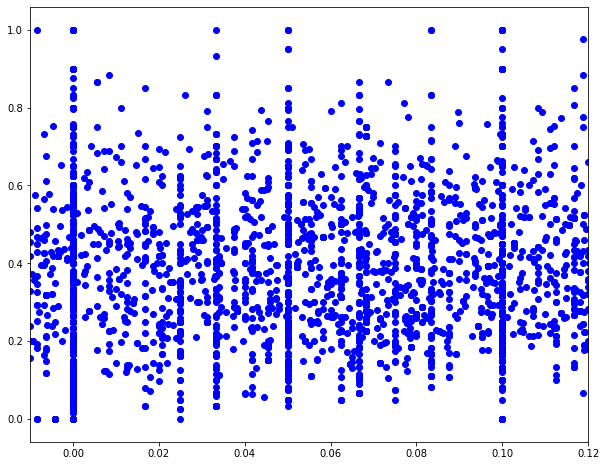

In [16]:
import matplotlib.pyplot as plt

data.reset_index()

plt.rcParams['figure.figsize'] = [10, 8]

for index, tweet in enumerate(data.index):
    x = data.polarity.loc[tweet]
    y = data.subjectivity.loc[tweet]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['user name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [18]:

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['polarity'].apply(getAnalysis)
# Show the dataframe
data

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,...,disgust,fear,joy,sadness,surprise,trust,sentiment,polarity,subjectivity,Analysis
0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.000000,...,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,Neutral
1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.0000,0.000000,0.000000,Neutral
2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.000000,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.166667,0.4019,-0.025000,0.281250,Negative
3,1028964314298896386,Mon Aug 13 11:19:44 +0000 2018,there is no planet “b”! there is no where to h...,1,0,86438480,CharlesBullar,Charles Bullard,"Wilmington, Delaware",0.266667,...,0.000000,0.266667,0.200000,0.133333,0.000000,0.200000,0.3365,0.150000,0.283333,Positive
4,1028966105841315842,Mon Aug 13 11:26:51 +0000 2018,a really good development... we want all parti...,2,2,41349406,JamiePolitics,Jamie Livingstone,Edinburgh,0.000000,...,0.000000,0.125000,0.125000,0.000000,0.125000,0.125000,0.8313,0.362121,0.434848,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67861,1121448529904455680,2019-04-25 16:18:59+00:00,"@warriorwoman91 like net-neutrality, pulling o...",0,0,847482300,ALowd34,"⚒Andrew Lowden, EA ⚒",Tampa FL,0.142857,...,0.142857,0.285714,0.000000,0.000000,0.000000,0.142857,0.5673,0.000000,0.000000,Neutral
67862,1121448820976566272,2019-04-25 16:20:09+00:00,@NPR How about teaching the truth!\nThe Paris ...,0,0,966188899365158912,KodiaksPal2,KodiaksPal2 ⭐️⭐️⭐️,Native Texan living in TN,0.111111,...,0.111111,0.111111,0.111111,0.111111,0.111111,0.333333,0.6845,0.312500,0.250000,Positive
67863,1121450110943223808,2019-04-25 16:25:16+00:00,UNDP Development Chief Calls for Action on Deb...,1,1,4088842828,SDGscameroon,SDGsCameroon,"Yaounde,Cameroon",0.300000,...,0.000000,0.100000,0.000000,0.200000,0.000000,0.100000,-0.3612,0.050000,0.050000,Positive
67864,1121457890328502272,2019-04-25 16:56:11+00:00,Write today and urge your representative to fu...,0,0,874127060,WendyDianaLukow,Wendy Diana Lukowitz,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.9041,0.100000,0.100000,Positive


In [24]:
data['Analysis'].value_counts()

Neutral     27834
Positive    27738
Negative    12294
Name: Analysis, dtype: int64

In [29]:
def getOpinion(score):
    if score < .5:
        return 'Fact'
    elif score == .5:
        return 'Neutral'
    else:
        return 'Opinion'

data['Opinion'] = data['subjectivity'].apply(getOpinion)
# Show the dataframe
data

,id_str,created_at,full_text,retweet_count,favorite_count,user_id,screen_name,name,location,negative,...,fear,joy,sadness,surprise,trust,sentiment,polarity,subjectivity,Analysis,Opinion
0,1028954737675251712,Mon Aug 13 10:41:41 +0000 2018,looking forward to be back @melblawschool for ...,4,20,969493444677787648,AustHelmut,Helmut Aust,"Berlin, Deutschland",0.000000,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,Neutral,Fact
1,1028961689679605760,Mon Aug 13 11:09:18 +0000 2018,@garden_hoe61 \nzero impact architecture\n#pod...,0,0,174786533,GPeconews,The GreenPreneur,United States,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.111111,0.0000,0.000000,0.000000,Neutral,Fact
2,1028962674871128064,Mon Aug 13 11:13:13 +0000 2018,@genejharriscb @repdwightevans this isn't the ...,0,0,194308084,Bestsurvivor,Myra,NaN,0.000000,...,0.083333,0.000000,0.000000,0.000000,0.166667,0.4019,-0.025000,0.281250,Negative,Fact
3,1028964314298896386,Mon Aug 13 11:19:44 +0000 2018,there is no planet “b”! there is no where to h...,1,0,86438480,CharlesBullar,Charles Bullard,"Wilmington, Delaware",0.266667,...,0.266667,0.200000,0.133333,0.000000,0.200000,0.3365,0.150000,0.283333,Positive,Fact
4,1028966105841315842,Mon Aug 13 11:26:51 +0000 2018,a really good development... we want all parti...,2,2,41349406,JamiePolitics,Jamie Livingstone,Edinburgh,0.000000,...,0.125000,0.125000,0.000000,0.125000,0.125000,0.8313,0.362121,0.434848,Positive,Fact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67861,1121448529904455680,2019-04-25 16:18:59+00:00,"@warriorwoman91 like net-neutrality, pulling o...",0,0,847482300,ALowd34,"⚒Andrew Lowden, EA ⚒",Tampa FL,0.142857,...,0.285714,0.000000,0.000000,0.000000,0.142857,0.5673,0.000000,0.000000,Neutral,Fact
67862,1121448820976566272,2019-04-25 16:20:09+00:00,@NPR How about teaching the truth!\nThe Paris ...,0,0,966188899365158912,KodiaksPal2,KodiaksPal2 ⭐️⭐️⭐️,Native Texan living in TN,0.111111,...,0.111111,0.111111,0.111111,0.111111,0.333333,0.6845,0.312500,0.250000,Positive,Fact
67863,1121450110943223808,2019-04-25 16:25:16+00:00,UNDP Development Chief Calls for Action on Deb...,1,1,4088842828,SDGscameroon,SDGsCameroon,"Yaounde,Cameroon",0.300000,...,0.100000,0.000000,0.200000,0.000000,0.100000,-0.3612,0.050000,0.050000,Positive,Fact
67864,1121457890328502272,2019-04-25 16:56:11+00:00,Write today and urge your representative to fu...,0,0,874127060,WendyDianaLukow,Wendy Diana Lukowitz,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.9041,0.100000,0.100000,Positive,Fact


In [30]:
data['Opinion'].value_counts()

Fact       48724
Opinion    15068
Neutral     4074
Name: Opinion, dtype: int64